In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
features = pd.read_csv("90_features.csv")
features.drop(features.columns[0],inplace=True,axis=1)
features.head()

,userID,summary,education,employability,num-connections,industry,title,skills,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,...,",","""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv
0,0,AmirAl A's Summary Looking for a job as a jour...,Master's,1,112,Public Relations and Communications,Journalist,0,29,15,18,14.5,1.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,2.347826,0.038462,1.266667,0.769231,23.0,9.0,3.0,2.0,170.0,40.0,15.0,14.0,0.0882,0.9333,0.3913,0.0,0.0,0.0,23.0,18.0,16.9,16.2,0.1353,0.340000,1.2474,1.7640,0.6105,5.7267,0.2000,1.0000,1.0000,0.7071,0.0667,0.0909,0.0667,0.0,0.0667
1,1,Reji Kumar A's Summary : Senior Product Develo...,Master of Technology (M.Tech.),1,75,Information Technology and Services,Senior Development Manager,"Software Project Management ,E-commerce ,SCADA...",31,13,15,31.0,1.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,2.043478,0.020305,0.551724,0.875000,26.0,10.0,3.0,2.0,162.0,34.0,12.0,10.0,0.0741,0.8333,0.3846,0.0,0.0,0.0,26.0,20.0,19.4,21.3,0.1605,0.400000,1.4444,2.0428,0.6404,6.1444,0.2500,0.5000,0.5000,0.5000,0.0833,0.1111,0.0833,0.0,0.0833
2,2,Riccardo A's Summary Specialties Surgical Onco...,Diagnostic Radiology,1,45,Hospital & Health Care,Honorary Professor,0,12,10,9,12.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,2.769231,0.009709,1.230769,0.846154,17.0,5.0,1.0,1.0,91.0,23.0,3.0,3.0,0.0330,1.0000,0.2941,0.0,0.0,0.0,17.0,17.0,15.6,14.8,0.1868,0.340000,1.2601,1.7821,0.6281,5.2675,0.3333,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,0.0,0.0000
3,3,Rezald A's Summary I enjoy working with people...,0,1,3,Environmental Services,Safety Supervisor,"Microsoft Office ,Microsoft Excel ,Microsoft W...",148,30,57,21.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.827586,0.014235,0.626667,0.650000,25.0,12.0,3.0,2.0,684.0,200.0,63.0,54.0,0.0921,0.8571,0.4800,0.0,0.0,0.0,25.0,21.0,17.9,19.0,0.0365,0.358462,0.6759,0.9559,0.4931,5.5928,0.0476,0.1111,0.1111,0.2357,0.0159,0.0208,0.0159,0.0,0.0159
4,4,"Rias Ahmed A's Summary MCTS, MCITP and MCSA Ce...",MBA,0,175,Information Technology and Services,0,"Project Management ,SQL Server 2008 ,Windows S...",43,20,28,43.0,8.0,0.0,7.0,0.0,0.0,15.0,11.0,1.0,0.0,0.0,2.0,18.0,10.0,4.0,0.0,0.0,1.0,9.0,3.0,13.0,0.0,1.0,0.0,6.0,0.0,8.0,2.0,10.0,...,3.0,0.0,0.0,2.371429,0.033435,1.023256,0.796296,26.0,11.0,3.0,2.0,275.0,61.0,29.0,27.0,0.1055,0.9310,0.4231,0.0,0.0,0.0,26.0,16.0,16.7,17.5,0.0945,0.328000,1.1086,1.5679,0.5801,5.8088,0.1034,0.5000,0.5000,0.5000,0.0345,0.0385,0.0345,0.0,0.0345


In [ ]:
X = features.iloc[:,8:]
print(len(X))
X.head()

66308


,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,",","""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv
0,29,15,18,14.5,1.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,0.0,2.347826,0.038462,1.266667,0.769231,23.0,9.0,3.0,2.0,170.0,40.0,15.0,14.0,0.0882,0.9333,0.3913,0.0,0.0,0.0,23.0,18.0,16.9,16.2,0.1353,0.340000,1.2474,1.7640,0.6105,5.7267,0.2000,1.0000,1.0000,0.7071,0.0667,0.0909,0.0667,0.0,0.0667
1,31,13,15,31.0,1.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,0.0,2.043478,0.020305,0.551724,0.875000,26.0,10.0,3.0,2.0,162.0,34.0,12.0,10.0,0.0741,0.8333,0.3846,0.0,0.0,0.0,26.0,20.0,19.4,21.3,0.1605,0.400000,1.4444,2.0428,0.6404,6.1444,0.2500,0.5000,0.5000,0.5000,0.0833,0.1111,0.0833,0.0,0.0833
2,12,10,9,12.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.769231,0.009709,1.230769,0.846154,17.0,5.0,1.0,1.0,91.0,23.0,3.0,3.0,0.0330,1.0000,0.2941,0.0,0.0,0.0,17.0,17.0,15.6,14.8,0.1868,0.340000,1.2601,1.7821,0.6281,5.2675,0.3333,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,0.0,0.0000
3,148,30,57,21.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.827586,0.014235,0.626667,0.650000,25.0,12.0,3.0,2.0,684.0,200.0,63.0,54.0,0.0921,0.8571,0.4800,0.0,0.0,0.0,25.0,21.0,17.9,19.0,0.0365,0.358462,0.6759,0.9559,0.4931,5.5928,0.0476,0.1111,0.1111,0.2357,0.0159,0.0208,0.0159,0.0,0.0159
4,43,20,28,43.0,8.0,0.0,7.0,0.0,0.0,15.0,11.0,1.0,0.0,0.0,2.0,18.0,10.0,4.0,0.0,0.0,1.0,9.0,3.0,13.0,0.0,1.0,0.0,6.0,0.0,8.0,2.0,10.0,6.0,6.0,5.0,1.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,2.371429,0.033435,1.023256,0.796296,26.0,11.0,3.0,2.0,275.0,61.0,29.0,27.0,0.1055,0.9310,0.4231,0.0,0.0,0.0,26.0,16.0,16.7,17.5,0.0945,0.328000,1.1086,1.5679,0.5801,5.8088,0.1034,0.5000,0.5000,0.5000,0.0345,0.0385,0.0345,0.0,0.0345


In [ ]:
X_employed = X.loc[features['employability']==1,:]
X_employed.reset_index(inplace=True,drop=True)
print(X_employed.tail())
X_unemployed = X.loc[features['employability']==0,:]
X_unemployed.reset_index(inplace=True,drop=True)
print(X_unemployed.tail())
print(len(X_employed))
print(len(X_unemployed))

       TotalWords  ComplexWords  UniqueWords  ...    adjv  advv    modv
57668         121            34           49  ...  0.0227   0.0  0.0227
57669          52            23           29  ...  0.0385   0.0  0.0385
57670          75            32           43  ...  0.0263   0.0  0.0263
57671          58            13           20  ...  0.0435   0.0  0.0435
57672         122            55           65  ...  0.0128   0.0  0.0128

[5 rows x 82 columns]
      TotalWords  ComplexWords  UniqueWords  AWPS  ...      nv    adjv  advv    modv
8630          70            42           51  10.4  ...  0.0294  0.0208   0.0  0.0208
8631          34            12           16  17.0  ...  0.0667  0.0000   0.0  0.0000
8632          70            26           36  10.4  ...  0.0312  0.0256   0.0  0.0256
8633         318           161          170  35.6  ...  0.0058  0.0050   0.0  0.0050
8634         188            45           73  12.6  ...  0.0147  0.0000   0.0  0.0000

[5 rows x 82 columns]
57673
8635


In [ ]:
max_employed = X_employed.sum(axis=1)
max_employed.sort_values(ascending=False,inplace=True)
#max_employed = max_employed[:len(X_unemployed)]

max_employed = max_employed[:8000]


#list(max_employed.index)
#print(X_employed.sum(axis=1))
#print(max_employed.keys())
#print(len(max_employed.keys()))
#max_employed = sorted(max_employed.items(), key= lambda x : x[1], reverse=True)[:8635]
#max_employed = pd.DataFrame(max_employed, columns= ["index","sum"])
#max_employed.set_index('index',inplace=True)
#print(max_employed.head(10))
X_max_employed = pd.DataFrame(columns=X_employed.columns)

X_max_employed = X_employed.iloc[max_employed.index]
X_max_employed.reset_index(inplace=True,drop=True)
X_max_employed.head()

,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,",","""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv
0,353,150,163,27.2,25.0,1.0,19.0,0.0,0.0,26.0,23.0,0.0,0.0,0.0,0.0,49.0,28.0,58.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,21.0,0.0,8.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,2.265823,0.013788,0.904762,0.532500,33.0,12.0,3.0,2.0,2064.0,583.0,227.0,211.0,0.1100,0.9295,0.3636,0.0,0.0,0.0,33.0,21.0,17.4,18.0,0.0160,0.354634,0.5136,0.7264,0.4581,6.1170,0.0132,0.0625,0.0625,0.1768,0.0044,0.0048,0.0044,0.0,0.0044
1,327,173,174,327.0,6.0,0.0,2.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,25.0,4.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,2.553191,0.018397,1.070234,0.542328,26.0,12.0,3.0,2.0,2036.0,522.0,250.0,204.0,0.1228,0.8160,0.4615,0.0,0.0,0.0,26.0,19.0,16.7,18.0,0.0128,0.338500,0.4074,0.5762,0.4276,5.7810,0.0120,0.0217,0.0217,0.1043,0.0040,0.0050,0.0040,0.0,0.0040
2,334,159,165,21.0,31.0,4.0,8.0,0.0,0.0,33.0,16.0,0.0,1.0,0.0,0.0,82.0,26.0,109.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,1.0,9.0,0.0,0.0,0.0,0.0,2.0,...,36.0,0.0,0.0,2.320988,0.015809,0.935103,0.552356,30.0,13.0,3.0,2.0,2080.0,525.0,224.0,185.0,0.1077,0.8259,0.4333,0.0,0.0,0.0,30.0,18.0,17.6,17.1,0.0144,0.350244,0.4651,0.6578,0.4452,5.9804,0.0134,0.0256,0.0256,0.1132,0.0045,0.0054,0.0045,0.0,0.0045
3,341,168,205,14.2,11.0,5.0,12.0,0.0,0.0,33.0,20.0,0.0,1.0,0.0,0.0,37.0,15.0,67.0,0.0,1.0,1.0,9.0,5.0,9.0,0.0,0.0,0.0,11.0,0.0,3.0,6.0,7.0,9.0,8.0,3.0,0.0,0.0,0.0,0.0,1.0,...,33.0,0.0,0.0,2.324324,0.029470,1.012232,0.609113,32.0,13.0,3.0,2.0,2073.0,528.0,216.0,188.0,0.1042,0.8704,0.4062,0.0,0.0,0.0,32.0,18.0,17.9,18.5,0.0154,0.350244,0.4970,0.7028,0.4538,6.0724,0.0139,0.0357,0.0357,0.1336,0.0046,0.0054,0.0046,0.0,0.0046
4,349,155,205,38.8,21.0,1.0,16.0,0.0,0.0,30.0,22.0,0.0,0.0,0.0,0.0,77.0,28.0,37.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,17.0,0.0,17.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,...,10.0,0.0,0.0,2.224638,0.026128,0.945559,0.614458,26.0,11.0,2.0,1.0,2078.0,526.0,183.0,163.0,0.0881,0.8907,0.4231,0.0,0.0,0.0,26.0,17.0,16.6,16.6,0.0125,0.346341,0.4033,0.5704,0.4265,5.7849,0.0109,0.0500,0.0500,0.1581,0.0055,0.0061,0.0000,0.0,0.0000


In [ ]:
len(X_max_employed)

8000

In [ ]:
max_unemployed = X_unemployed.sum(axis=1)
max_unemployed.sort_values(ascending=False,inplace=True)

#max_unemployed = max_unemployed[:len(X_unemployed)]
max_unemployed = max_unemployed[:8000]

X_max_unemployed = pd.DataFrame(columns=X_unemployed.columns)

X_max_unemployed = X_unemployed.iloc[max_unemployed.index]
X_max_unemployed.reset_index(inplace=True,drop=True)
X_max_unemployed.head()

,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,",","""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv
0,360,148,172,24.1,10.0,4.0,33.0,0.0,0.0,39.0,18.0,2.0,2.0,0.0,1.0,39.0,15.0,57.0,0.0,1.0,3.0,11.0,9.0,15.0,0.0,1.0,0.0,7.0,0.0,6.0,14.0,3.0,5.0,3.0,10.0,1.0,0.0,0.0,1.0,2.0,...,15.0,0.0,0.0,2.283465,0.020268,0.960894,0.524941,32.0,12.0,3.0,2.0,2029.0,531.0,212.0,196.0,0.1045,0.9245,0.3750,0.0,0.0,0.0,32.0,22.0,17.5,16.9,0.0158,0.348500,0.5023,0.7104,0.4551,6.0695,0.0142,0.0625,0.0625,0.1768,0.0047,0.0053,0.0047,0.0,0.0047
1,305,174,164,50.8,14.0,1.0,22.0,0.0,0.0,24.0,18.0,0.0,1.0,0.0,1.0,48.0,9.0,13.0,0.0,0.0,2.0,9.0,3.0,7.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,4.0,6.0,8.0,6.0,1.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,2.533613,0.011097,1.149837,0.564179,26.0,12.0,3.0,2.0,2086.0,557.0,242.0,215.0,0.1160,0.8884,0.4615,0.0,0.0,0.0,26.0,19.0,17.4,16.7,0.0125,0.342439,0.4025,0.5693,0.4263,5.7856,0.0124,0.0370,0.0370,0.1361,0.0041,0.0049,0.0041,0.0,0.0041
2,366,155,152,24.4,11.0,2.0,1.0,0.0,1.0,15.0,8.0,0.0,0.0,0.0,0.0,17.0,18.0,57.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,23.0,0.0,0.0,2.381148,0.015055,1.005540,0.503704,27.0,12.0,3.0,2.0,2092.0,562.0,237.0,216.0,0.1133,0.9114,0.4444,0.0,0.0,0.0,27.0,16.0,17.1,16.6,0.0129,0.341463,0.4174,0.5903,0.4311,5.8364,0.0127,0.0476,0.0476,0.1543,0.0042,0.0048,0.0042,0.0,0.0042
3,359,146,174,17.9,11.0,1.0,13.0,0.0,0.0,38.0,14.0,0.0,0.0,0.0,0.0,46.0,5.0,93.0,2.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,4.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,...,20.0,0.0,0.0,2.157692,0.018595,1.028169,0.559322,31.0,13.0,3.0,2.0,1979.0,569.0,208.0,184.0,0.1051,0.8846,0.4194,0.0,0.0,0.0,31.0,17.0,16.6,18.6,0.0157,0.352821,0.4927,0.6968,0.4524,6.0200,0.0144,0.0417,0.0417,0.1443,0.0048,0.0056,0.0048,0.0,0.0048
4,325,172,172,23.3,8.0,3.0,5.0,0.0,0.0,18.0,17.0,0.0,1.0,0.0,0.0,35.0,26.0,25.0,0.0,0.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,3.0,1.0,4.0,1.0,6.0,2.0,1.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,2.345528,0.025610,0.990712,0.548969,31.0,13.0,3.0,2.0,2065.0,537.0,226.0,194.0,0.1094,0.8584,0.4194,0.0,0.0,0.0,31.0,19.0,18.1,17.5,0.0150,0.351707,0.4824,0.6822,0.4499,6.0260,0.0133,0.0312,0.0312,0.1250,0.0044,0.0052,0.0044,0.0,0.0044


In [ ]:
len(X_max_unemployed)

8000

3 dataframes -

        X_max_employed - length -> 8635
        X_employed - length -> 57k
        X_unemployed - lenght -> 8635

In [ ]:
X_max_employed.loc[:,'employability'] = 1
X_max_unemployed.loc[:,'employability'] = 0
X_max_unemployed.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,"""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,employability
0,360,148,172,24.1,10.0,4.0,33.0,0.0,0.0,39.0,18.0,2.0,2.0,0.0,1.0,39.0,15.0,57.0,0.0,1.0,3.0,11.0,9.0,15.0,0.0,1.0,0.0,7.0,0.0,6.0,14.0,3.0,5.0,3.0,10.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,2.283465,0.020268,0.960894,0.524941,32.0,12.0,3.0,2.0,2029.0,531.0,212.0,196.0,0.1045,0.9245,0.3750,0.0,0.0,0.0,32.0,22.0,17.5,16.9,0.0158,0.348500,0.5023,0.7104,0.4551,6.0695,0.0142,0.0625,0.0625,0.1768,0.0047,0.0053,0.0047,0.0,0.0047,0
1,305,174,164,50.8,14.0,1.0,22.0,0.0,0.0,24.0,18.0,0.0,1.0,0.0,1.0,48.0,9.0,13.0,0.0,0.0,2.0,9.0,3.0,7.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,4.0,6.0,8.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.533613,0.011097,1.149837,0.564179,26.0,12.0,3.0,2.0,2086.0,557.0,242.0,215.0,0.1160,0.8884,0.4615,0.0,0.0,0.0,26.0,19.0,17.4,16.7,0.0125,0.342439,0.4025,0.5693,0.4263,5.7856,0.0124,0.0370,0.0370,0.1361,0.0041,0.0049,0.0041,0.0,0.0041,0
2,366,155,152,24.4,11.0,2.0,1.0,0.0,1.0,15.0,8.0,0.0,0.0,0.0,0.0,17.0,18.0,57.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,2.381148,0.015055,1.005540,0.503704,27.0,12.0,3.0,2.0,2092.0,562.0,237.0,216.0,0.1133,0.9114,0.4444,0.0,0.0,0.0,27.0,16.0,17.1,16.6,0.0129,0.341463,0.4174,0.5903,0.4311,5.8364,0.0127,0.0476,0.0476,0.1543,0.0042,0.0048,0.0042,0.0,0.0042,0
3,359,146,174,17.9,11.0,1.0,13.0,0.0,0.0,38.0,14.0,0.0,0.0,0.0,0.0,46.0,5.0,93.0,2.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,4.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.157692,0.018595,1.028169,0.559322,31.0,13.0,3.0,2.0,1979.0,569.0,208.0,184.0,0.1051,0.8846,0.4194,0.0,0.0,0.0,31.0,17.0,16.6,18.6,0.0157,0.352821,0.4927,0.6968,0.4524,6.0200,0.0144,0.0417,0.0417,0.1443,0.0048,0.0056,0.0048,0.0,0.0048,0
4,325,172,172,23.3,8.0,3.0,5.0,0.0,0.0,18.0,17.0,0.0,1.0,0.0,0.0,35.0,26.0,25.0,0.0,0.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,3.0,1.0,4.0,1.0,6.0,2.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.345528,0.025610,0.990712,0.548969,31.0,13.0,3.0,2.0,2065.0,537.0,226.0,194.0,0.1094,0.8584,0.4194,0.0,0.0,0.0,31.0,19.0,18.1,17.5,0.0150,0.351707,0.4824,0.6822,0.4499,6.0260,0.0133,0.0312,0.0312,0.1250,0.0044,0.0052,0.0044,0.0,0.0044,0


In [ ]:
X_max_employed.head()

,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,"""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,employability
0,353,150,163,27.2,25.0,1.0,19.0,0.0,0.0,26.0,23.0,0.0,0.0,0.0,0.0,49.0,28.0,58.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,21.0,0.0,8.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.265823,0.013788,0.904762,0.532500,33.0,12.0,3.0,2.0,2064.0,583.0,227.0,211.0,0.1100,0.9295,0.3636,0.0,0.0,0.0,33.0,21.0,17.4,18.0,0.0160,0.354634,0.5136,0.7264,0.4581,6.1170,0.0132,0.0625,0.0625,0.1768,0.0044,0.0048,0.0044,0.0,0.0044,1
1,327,173,174,327.0,6.0,0.0,2.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,25.0,4.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.553191,0.018397,1.070234,0.542328,26.0,12.0,3.0,2.0,2036.0,522.0,250.0,204.0,0.1228,0.8160,0.4615,0.0,0.0,0.0,26.0,19.0,16.7,18.0,0.0128,0.338500,0.4074,0.5762,0.4276,5.7810,0.0120,0.0217,0.0217,0.1043,0.0040,0.0050,0.0040,0.0,0.0040,1
2,334,159,165,21.0,31.0,4.0,8.0,0.0,0.0,33.0,16.0,0.0,1.0,0.0,0.0,82.0,26.0,109.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,1.0,9.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.320988,0.015809,0.935103,0.552356,30.0,13.0,3.0,2.0,2080.0,525.0,224.0,185.0,0.1077,0.8259,0.4333,0.0,0.0,0.0,30.0,18.0,17.6,17.1,0.0144,0.350244,0.4651,0.6578,0.4452,5.9804,0.0134,0.0256,0.0256,0.1132,0.0045,0.0054,0.0045,0.0,0.0045,1
3,341,168,205,14.2,11.0,5.0,12.0,0.0,0.0,33.0,20.0,0.0,1.0,0.0,0.0,37.0,15.0,67.0,0.0,1.0,1.0,9.0,5.0,9.0,0.0,0.0,0.0,11.0,0.0,3.0,6.0,7.0,9.0,8.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.324324,0.029470,1.012232,0.609113,32.0,13.0,3.0,2.0,2073.0,528.0,216.0,188.0,0.1042,0.8704,0.4062,0.0,0.0,0.0,32.0,18.0,17.9,18.5,0.0154,0.350244,0.4970,0.7028,0.4538,6.0724,0.0139,0.0357,0.0357,0.1336,0.0046,0.0054,0.0046,0.0,0.0046,1
4,349,155,205,38.8,21.0,1.0,16.0,0.0,0.0,30.0,22.0,0.0,0.0,0.0,0.0,77.0,28.0,37.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,17.0,0.0,17.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,2.224638,0.026128,0.945559,0.614458,26.0,11.0,2.0,1.0,2078.0,526.0,183.0,163.0,0.0881,0.8907,0.4231,0.0,0.0,0.0,26.0,17.0,16.6,16.6,0.0125,0.346341,0.4033,0.5704,0.4265,5.7849,0.0109,0.0500,0.0500,0.1581,0.0055,0.0061,0.0000,0.0,0.0000,1


In [ ]:
ML_features = X_max_employed.append(X_max_unemployed,ignore_index=True)
ML_features = ML_features.sample(frac=1).reset_index(drop=True)
print(len(ML_features))
ML_features.head()

16000


,TotalWords,ComplexWords,UniqueWords,AWPS,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,MD,NN,NNS,NNP,NNPS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,(,...,"""",!,Avg_Syllables,Count_Punctuation,Functional_Words,type_token_ratio,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,employability
0,160,78,81,26.7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,17.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.406780,0.012998,0.918750,0.640449,25.0,11.0,3.0,2.0,971.0,262.0,105.0,97.0,0.1081,0.9238,0.4400,0.0,0.0,0.0,25.0,18.0,17.3,17.9,0.0257,0.352632,0.5673,0.8023,0.4680,5.6148,0.0286,0.1250,0.1250,0.2500,0.0095,0.0106,0.0095,0.0,0.0095,1
1,163,104,117,27.2,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.317568,0.030389,1.030675,0.683962,34.0,12.0,3.0,2.0,1189.0,304.0,119.0,105.0,0.1001,0.8824,0.3529,0.0,0.0,0.0,34.0,16.0,18.8,19.0,0.0286,0.364348,0.6972,0.9860,0.4980,6.1260,0.0252,0.0714,0.0714,0.1890,0.0084,0.0104,0.0084,0.0,0.0084,1
2,77,29,40,15.2,2.0,2.0,4.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,9.0,0.0,95.0,2.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,1.687500,0.037849,0.670886,0.673469,27.0,11.0,3.0,2.0,403.0,109.0,37.0,31.0,0.0918,0.8378,0.4074,0.0,0.0,0.0,27.0,20.0,19.0,17.3,0.0670,0.357500,0.9510,1.3450,0.5494,5.7819,0.0811,0.1667,0.1667,0.2887,0.0270,0.0345,0.0270,0.0,0.0270,0
3,27,9,16,13.5,5.0,0.0,4.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0,12.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.047619,0.029762,0.896552,0.903226,25.0,12.0,3.0,2.0,137.0,47.0,19.0,18.0,0.1387,0.9474,0.4800,0.0,0.0,0.0,25.0,20.0,18.3,19.0,0.1825,0.390000,1.5103,2.1359,0.6542,6.1799,0.1579,1.0000,1.0000,0.7071,0.0526,0.0625,0.0526,0.0,0.0526,0
4,238,100,130,12.6,7.0,1.0,1.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0,0.0,20.0,10.0,12.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.277457,0.020178,1.024896,0.615108,30.0,13.0,3.0,2.0,1402.0,360.0,155.0,134.0,0.1106,0.8645,0.4333,0.0,0.0,0.0,30.0,18.0,17.1,17.2,0.0214,0.349286,0.5665,0.8012,0.4694,5.9307,0.0194,0.0476,0.0476,0.1543,0.0065,0.0075,0.0065,0.0,0.0065,0


In [ ]:
ML_features[['employability']].sum()

employability    8000
dtype: int64

In [ ]:
X = np.array(ML_features.iloc[:,:82])
y = np.array(ML_features.loc[:,'employability'])
y

array([1, 1, 0, ..., 0, 1, 0])

Starting ML model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
def error_plots(x_range,mean_error,std_error,x_name="",title_text=""):
    '''
    This function plot errorbars
    '''
    plt.xlabel(x_name,fontweight='bold')
    plt.ylabel("Accuracy Score",fontweight='bold')
    plt.title("Error Bar for "+title_text,fontweight='bold')
    plt.errorbar(x_range,mean_error,std_error)
    plt.show()

In [ ]:
#Error-bars for Logistic Regression C Value
from sklearn.linear_model import LogisticRegression

def error_bar_LR(X,y):
    '''
    This fucntion takes X data and y data, 
    trains Logistic regression model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        for train,test in kf.split(X):
            model = LogisticRegression(C=C_value, max_iter=5000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for Logistic Regression
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for Logistic Regression")
    #error_plots(C_range[:4],mean_accuracy[:4],std_accuracy[:4],"C range","for Logistic Regression")

    print("For Logistic Regression\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))

error_bar_LR(X,y)

KeyboardInterrupt: ignored

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.1, max_iter=10000)
LR_model.fit(X_train,y_train)

LR_predict = LR_model.predict(X_test)

print("Logistic Regression Test accuracy score : {}".format(accuracy_score(y_test,LR_predict)))

LR_train_predict = LR_model.predict(X_train)

print("Logistic Regression Train accuracy : {}".format(accuracy_score(y_train,LR_train_predict)))

Logistic Regression Test accuracy score : 0.914375
Logistic Regression Train accuracy : 0.919296875


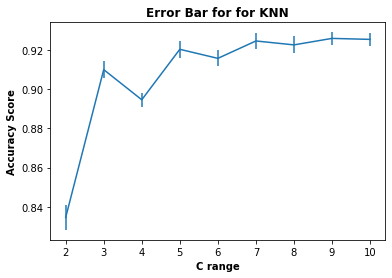

For KNN
	best value of K - 9
	with accuracy = 0.9258750000000001


In [ ]:
#Error bar for KNN
from sklearn.neighbors import KNeighborsClassifier

def error_bar_KNN(X,y):
    '''
    This fucntion takes X data and y data, 
    trains KNN model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''
    K_range = [2,3,4,5,6,7,8,9,10]

    mean_accuracy=[]
    std_accuracy=[]
    for K_value in K_range:
        temp=[]
        for train,test in kf.split(X):
            model = KNeighborsClassifier(n_neighbors=K_value).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())

    #Error bar for KNN
    error_plots(K_range,mean_accuracy,std_accuracy,"C range","for KNN")

    print("For KNN\n\tbest value of K - {}\n\twith accuracy = {}".
          format(K_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))
    
error_bar_KNN(X,y)

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

KNeighbor = KNeighborsClassifier(n_neighbors=9, weights='uniform')
KNeighbor.fit(X_train,y_train)

KNN_predict = KNeighbor.predict(X_test)

print("KNN Test accuracy : {}".format(accuracy_score(y_test,KNN_predict)))

KNN_train_predict = KNeighbor.predict(X_train)

print("KNN Train accuracy : {}".format(accuracy_score(y_train,KNN_train_predict)))

KNN Test accuracy : 0.9240625
KNN Train accuracy : 0.929375


0.01


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

100


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

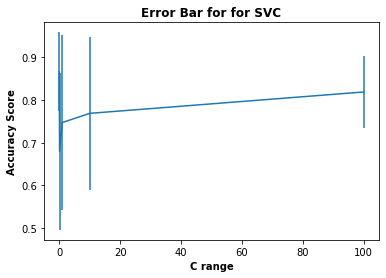

For SVC
	best value of C - 0.01
	with accuracy = 0.866375


In [ ]:
#Error bar for SVM C Value
from sklearn.svm import LinearSVC

def error_bar_SVC(X,y):
    '''
    This fucntion takes X data and y data, 
    trains SVC model over the data
    then plots errorbar of mean accuracy and standard deviation in accuracy 
    values of different splits.
    It then gives the best parameter value with an accuracy score
    '''

    C_range = [0.01,0.1,1,10,100]

    mean_accuracy=[]
    std_accuracy=[]

    for C_value in C_range:
        temp=[]
        print(C_value)
        for train,test in kf.split(X):
            model = LinearSVC(C=C_value,max_iter=5000).fit(X[train],y[train])
            prediction = model.predict(X[test])
            temp.append(accuracy_score(y[test],prediction))
        mean_accuracy.append(np.array(temp).mean())
        std_accuracy.append(np.array(temp).std())
    
    #Error bar for SVC
    error_plots(C_range,mean_accuracy,std_accuracy,"C range","for SVC")
    #error_plots(C_range[:3],mean_accuracy[:3],std_accuracy[:3],"C range","for SVC")

    print("For SVC\n\tbest value of C - {}\n\twith accuracy = {}".
          format(C_range[mean_accuracy.index(max(mean_accuracy))],max(mean_accuracy)))
    
error_bar_SVC(X,y)

In [ ]:
#SVC
from sklearn.svm import LinearSVC

SVC_model = LinearSVC(C=0.01,max_iter=10000) 
SVC_model.fit(X_train,y_train)

SVC_predict = SVC_model.predict(X_test)

print("SVC Test accuracy: {}".format(accuracy_score(y_test,SVC_predict)))

SVC_train_predict = SVC_model.predict(X_train)

print("SVC Train accuracy : {}".format(accuracy_score(y_train,SVC_train_predict)))

SVC Test accuracy: 0.9190625
SVC Train accuracy : 0.9215625


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train,y_train)
dummy_prediction = dummy.predict(X_test)

print("Dummy classifier accuracy score : {}".format(accuracy_score(y_test,dummy_prediction)))

dummy_train_predict = dummy.predict(X_train)

print("Dummy Train accuracy : {}".format(accuracy_score(y_train,dummy_train_predict)))

Dummy classifier accuracy score : 0.4940625
Dummy Train accuracy : 0.501484375


Correlation Plots

In [ ]:
employed_mean = X_max_employed.mean()
unemployed_mean = X_max_unemployed.mean()
keys = abs(employed_mean-unemployed_mean).sort_values(ascending=False)[:8]
keys = keys.keys()
keys

Index(['wordtokens', 'swordtokens', 'TotalWords', 'lextokens', 'slextokens',
       'UniqueWords', 'ComplexWords', 'AWPS'],
      dtype='object')

In [ ]:
def bar_plots(key):
    height = [employed_mean[key],unemployed_mean[key]]
    bars = ('employed', "unemployed")
    y_pos = np.arange(len(bars))

    plt.title('{} VS Employability'.format(key), fontweight='bold')
    plt.xlabel('Employability Status', fontweight='bold')
    plt.ylabel('Average of {}'.format(key) ,fontweight='bold')
    

    plt.bar(y_pos, height, color = 'navy', width = 0.25)
    plt.xticks(y_pos, bars)
    plt.show()


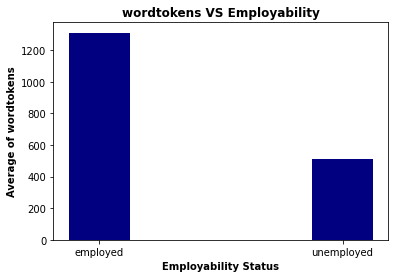

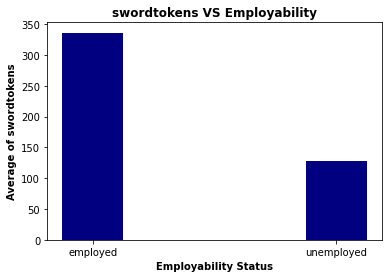

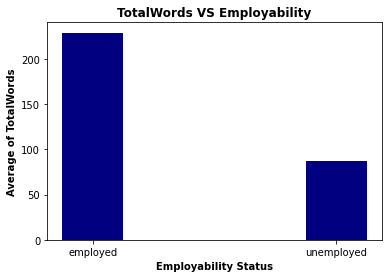

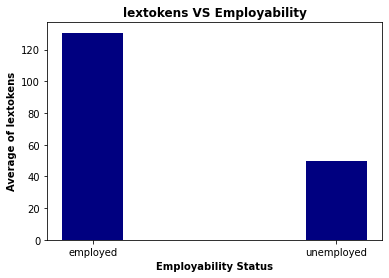

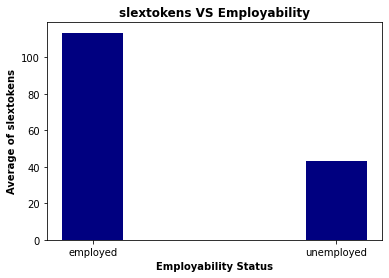

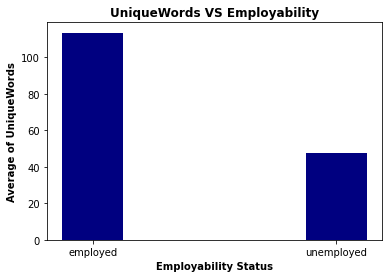

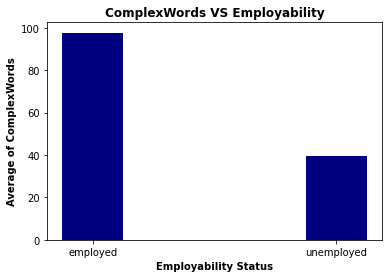

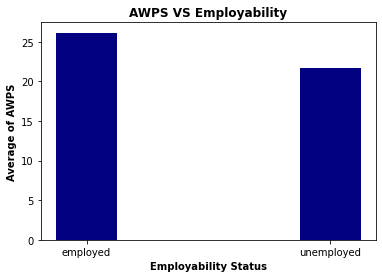

In [ ]:
for key in keys:
    bar_plots(key)